# TP noté "Machine Learning 1" <a class="tocSkip">
11 janvier 2023


Les données proposées dans ce sujet sont des données synthétiques qui nous permettront d'examiner et mettre en oeuvre plusieurs des méthodes rencontrées dans l'unité. Ce sujet traitera ainsi de

- régression de Poisson et régression linéaire
- clustering (avec KMeans)
- discrimination avec une régression logistique
- estimation des performances par validation croisée
- estimation d'incertitudes par bootstrap

**Instructions** 

- répondre aux questions en utilisant _le langage de votre choix_, soit dans un Notebook Jupyter, soit dans un notebook Rstudio
- vous ferez les calculs et tracerez les figures demandées. Vous insèrerez vos commentaires dans une cellule markdown/texte. _**Il est impératif de commenter ce que vous faites, pourquoi, et les résultats que vous obtenez ; le code seul ne vous rapportera qu'un peu plus de la moitié des points.**_  
- vous pouvez même utiliser plusieurs langages si vous le souhaitez
- tous documents autorisés
- interdiction de communiquer avec d'autres intelligences, humaines ou artificielles. 
- en fin de session, vous rendrez votre notebook en le téléversant sur icampus


**Les parties 2, 3, 4, 5 (partiellement) sont indépendantes** 

## 1 - Données

- Charger le fichier `Data_2023.csv`.Vous appellerez `df` le dataframe.  
- Combien ce fichier contient-il d'exemples, de variables ? 
- Quelles peuvent être les variables catégorielles ? 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Data_2023.csv")
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,r
0,-5.244266,A,-2.544469,-12,0,0.0,-7,-19,8,0
1,6.000000,A,4.922793,4,0,NaN,6,11,10,0
2,-7.882469,B,0.087773,-10,0,0.0,-11,-20,8,1
3,-7.155857,A,-0.713578,-13,0,1.0,-10,-24,7,1
4,2.257337,B,-2.380117,5,1,0.0,3,9,10,0


In [3]:
df.shape

(4500, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      4500 non-null   float64
 1   v2      4500 non-null   object 
 2   v3      4500 non-null   float64
 3   v4      4500 non-null   int64  
 4   v5      4500 non-null   int64  
 5   v6      3639 non-null   float64
 6   v7      4500 non-null   int64  
 7   v8      4500 non-null   int64  
 8   v9      4500 non-null   int64  
 9   r       4500 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 351.7+ KB


In [5]:
df.describe()

,v1,v3,v4,v5,v6,v7,v8,v9,r
count,4500.000000,4500.000000,4500.000000,4500.000000,3639.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,-0.484474,2.040934,-1.019556,0.513778,2.686452,-1.030000,-2.042444,7.959111,0.522444
std,5.217181,3.369168,6.286066,0.499866,7.587627,5.663313,11.382076,2.205918,0.499552
min,-8.000000,-11.511216,-13.000000,0.000000,0.000000,-11.000000,-25.000000,1.000000,0.000000
25%,-6.657009,-0.362757,-6.000000,0.000000,0.000000,-6.000000,-13.000000,6.000000,0.000000
50%,0.030863,1.098260,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,5.000000,5.524902,4.000000,1.000000,0.000000,3.000000,7.000000,9.000000,1.000000
max,6.000000,9.395279,10.000000,1.000000,71.000000,8.000000,19.000000,16.000000,1.000000


In [6]:
df.v2.unique()

array(['A', 'B'], dtype=object)

In [7]:
df.v2 = df.v2.replace({"A":0, "B":1})

In [8]:
df.v2.unique()

array([0, 1], dtype=int64)

In [9]:
df.v4.unique()

array([-12,   4, -10, -13,   5,  -5,   8,   3,   0,   1,   6,  -9,  -6,
         9,  -1,   2,  -3,  -4,  -2,  -7, -11,   7,  -8,  10], dtype=int64)

In [10]:
df.v5.unique()

array([0, 1], dtype=int64)

In [11]:
df.v6.unique()

array([ 0., nan,  1., 11., 16., 47., 20., 14.,  5.,  6., 15.,  2.,  9.,
        3., 12., 24., 13.,  8., 22., 50.,  4., 25., 10., 41., 18.,  7.,
       26., 23., 64., 71., 19., 17., 37., 35., 43., 33., 21., 52., 30.,
       28., 39., 46., 70., 32., 36., 44., 31., 29., 34., 55., 27., 45.,
       58., 56., 40., 63., 60., 48., 49., 53., 57., 51.])

In [12]:
df.v7.unique()

array([ -7,   6, -11, -10,   3,   2,  -3,   1,   8,   7,  -5,  -6,  -2,
         4,   5,  -9,  -1,  -8,   0], dtype=int64)

In [13]:
df.v8.unique()

array([-19,  11, -20, -24,   9, -14,  10,   6,   3,   0,   1,  15,  12,
        16, -15,   2, -10,  -6,   5,   7,  13, -23,  14,  -4,   8, -21,
       -12, -16,   4, -13,  -7,  -2, -11,  -3, -18, -17, -22,  -1,  -5,
        -9,  -8,  17,  18, -25,  19], dtype=int64)

In [14]:
df.v9.unique()

array([ 8, 10,  7,  9,  5, 11,  6, 12,  3, 14,  4,  2, 13, 15,  1, 16],
      dtype=int64)

In [15]:
df.r.unique()

array([0, 1], dtype=int64)

In [16]:
df.isna().sum()/df.shape[0]*100

v1     0.000000
v2     0.000000
v3     0.000000
v4     0.000000
v5     0.000000
v6    19.133333
v7     0.000000
v8     0.000000
v9     0.000000
r      0.000000
dtype: float64

- Examiner quelles sont les corrélations entre les différentes variables

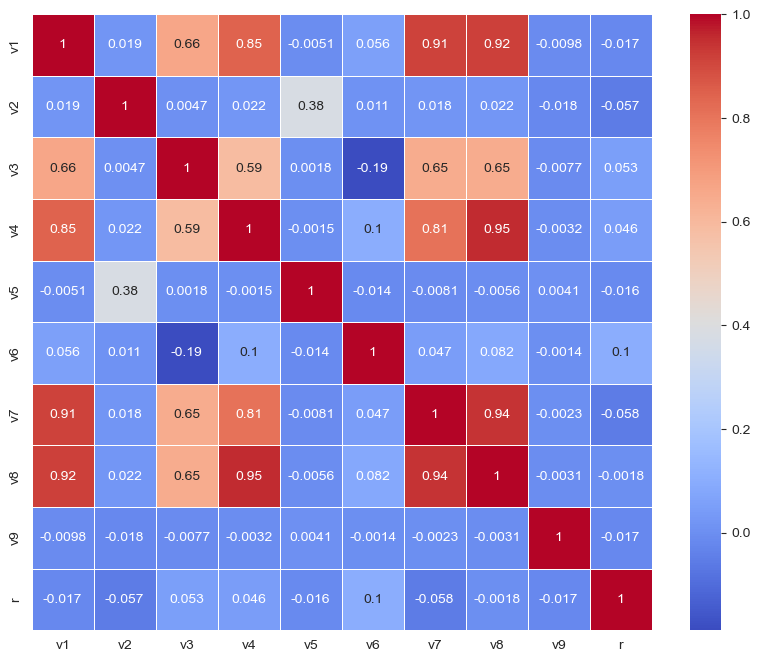

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.show()

- Tracer les histogrammes des variables 1, 3, 5. Peut-on soupçonner qu'il y ait des sous ensembles d'exemples avec des comportements différents ? 

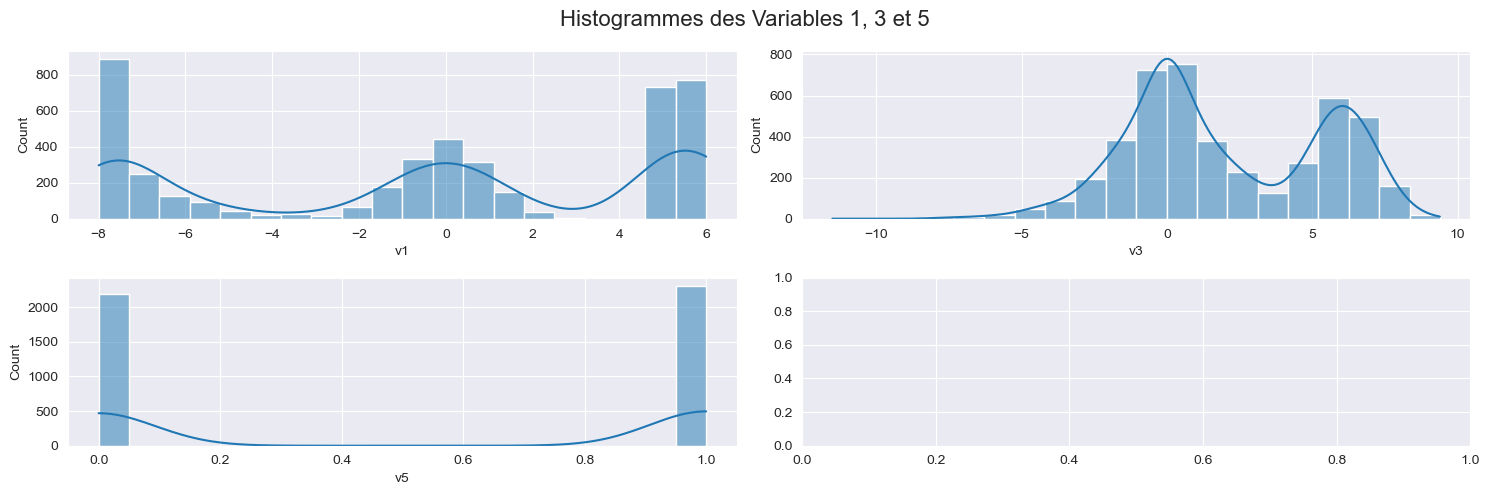

In [18]:
variables_of_interest = ['v1', 'v3', 'v5']

fig, axes = plt.subplots(nrows=int(len(variables_of_interest)/2+1), ncols=2, figsize=(15, 5))

for i, variable in enumerate(variables_of_interest):
    sns.histplot(df[variable], bins=20, kde=True, ax=axes[i//2, i%2])

fig.suptitle('Histogrammes des Variables 1, 3 et 5', fontsize=16)

plt.tight_layout()

plt.show()

## 2 - Conversion

La variable 2, `v2`, est catégorielle. Convertir cette variable en binaire, sur deux niveaux 0 et 1 ; et mettre à jour le dataframe `df`. Si vous n'arriviez pas à réaliser cette opération, charger le résultat `Data_2023b.csv` 

déja fait

In [19]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,r
0,-5.244266,0,-2.544469,-12,0,0.0,-7,-19,8,0
1,6.000000,0,4.922793,4,0,NaN,6,11,10,0
2,-7.882469,1,0.087773,-10,0,0.0,-11,-20,8,1
3,-7.155857,0,-0.713578,-13,0,1.0,-10,-24,7,1
4,2.257337,1,-2.380117,5,1,0.0,3,9,10,0


## 3 - Discrimination (régression logistique)

La réponse est la variable `r`. On cherche à prédire cette réponse `r` à partir des variables explicatives `v1` à `v9`. Si le dataframe contient des variables supplémentaires, vous ne les utiliserez pas pour la discrimination. 

- Séparer les données en une base d'apprentissage et une base de test, avec un ratio 2/3, 1/3. 
- Apprendre une régression logistique (classe `LogisticRegression` en python/sklearn, fonction `glm` avec le paramètre `family=binomial` en R ou en Python avec statsmodels)
- Calculer les scores sur les bases de test et d'apprentissage. Ces scores sont-ils différents, commenter.
- Calculer la matrice de confusion (sur la base de test !). Quel est le taux de faux positifs ? NB - Sous python, vous pouvez utiliser `pd.crosstab` pour calculer cette matrice de confusion
- Apprendre la régression sur la base complète et calculer le score par validation croisée. Comparer le score obtenu par validation croisée à celui obtenu sur la base de test. Quel est l'intérêt de la validation croisée (au moins si les données sont en nombre faible) ?


NB - la variable `v6` présente des valeurs manquantes NA. **Si** cela posait des difficultés à la méthode que vous employez, ce n'est pas obligé, vous pouvez (i) soit supprimer les lignes correspondantes (ii) soit utiliser le fichier `Data_2023c.csv` 

In [20]:
from sklearn.model_selection import train_test_split

df2 = df.dropna(subset=['v6'])
X = df2.drop(columns=['r'])  # Remplacez 'target_column' par le nom de votre variable cible
y = df2['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Dimensions de la base d'apprentissage (X_train):", X_train.shape)
print("Dimensions de la base de test (X_test):", X_test.shape)
print("Dimensions de la base d'apprentissage (y_train):", y_train.shape)
print("Dimensions de la base de test (y_test):", y_test.shape)


Dimensions de la base d'apprentissage (X_train): (2438, 9)
Dimensions de la base de test (X_test): (1201, 9)
Dimensions de la base d'apprentissage (y_train): (2438,)
Dimensions de la base de test (y_test): (1201,)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error

print("score (train)", model.score(X_train,y_train))
print("score (test)",model.score(X_test,y_test))
eqm_train = mean_squared_error(y_train, model.predict(X_train))
eqm_test = mean_squared_error(y_test, model.predict(X_test))
print("Erreur moyenne (train) : ", eqm_train )
print("Erreur moyenne (test) : ", eqm_test )

score (train) 0.6009023789991796
score (test) 0.630308076602831
Erreur moyenne (train) :  0.39909762100082036
Erreur moyenne (test) :  0.36969192339716905


In [23]:
pd.crosstab(y_test, model.predict(X_test))

col_0,0,1
r,,
0,329,254
1,190,428


In [24]:
from sklearn.model_selection import cross_val_score

# Créer et ajuster le modèle de régression logistique sur l'ensemble des données
model = LogisticRegression(random_state=42)

# Calculer le score par validation croisée
cv_score = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print("Score par validation croisée:", cv_score.mean())


Score par validation croisée: 0.6119978506342143


Text(0, 0.5, 'EQM par validation croisée')

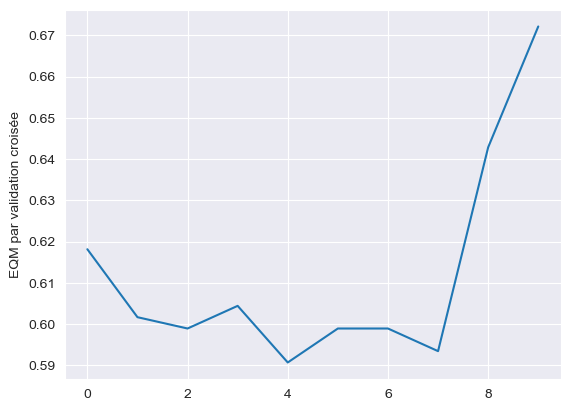

In [25]:
plt.plot(cv_score)
plt.ylabel("EQM par validation croisée")

## 4 - Régression linéaire et de Poisson

On est ennuyé avec les valeurs manquantes dans la variable `v6`. On décide d'imputer ces valeurs manquantes. Pour cela, on va tenter de prédire les valeurs manquantes à partir des autres variables. 

Sous R, vous pourrez utilier la fonction `lm`, et sous Python, vous pourrez charger l'équivalent par `from LinearRegression_in_Python_like_in_R import lm`. Vous pouvez également utiliser un modèle linéaire généralisé `glm` ; sous Python vous pourrez utiliser la fonction `glm` de statsmodels, et les fonctions de résumé et de diagnostique selon `from GLMRegression_in_Python_like_in_R import GLMsummary, glm_residplot`


- Suivant les outils que vous utilisez, vous pourrez ou pas utiliser la base `df` avec les valeurs manquantes. Le cas échéant, supprimer toutes les lignes sans NA pour la variable `v6`. Sous Python, vous pourrez utiliser `.dropna`, mais également`.notna()` pour accéder aux indices des lignes ne contenant pas de NA, et `.isna()` pour les lignes avec NA. 

**4.1 - Régression linéaire**
- Effectuer une prédiction lineaire de `v6` en fonction des autres variables explicatives (les variables en `v.`, pas `r`)
- Calculer l'erreur quadratique moyenne entre les valeurs exactes et prédites de `v6`. Vous pouvez éventuellement directement accéder à un prédicteur via une méthode `.predict()`, voire même directement aux residus via un attribut `.residuals` 
- Au vu des résultats, quelles sont les variables importantes
- Examiner les graphes de diagnostic. Pouvez vous soupçonner une non linarité, pourquoi ? 
- Effectuer une nouvelle prédiction en ajoutant la variable `v3**2`. Que devient alors l'erreur quadratique moyenne ? La variable v5 est-elle utile ? 
- Si vous ajoutiez `v5**2` plutôt que `v3**2`, quelle seraient l'erreur quadratique moyenne ? Commentaires. 

**4.2 - Régression de Poisson**
- Effectuer une régression de Poisson de `v6` en fonction des autres variables explicatives (les variables en `v.`, pas `r`)
- Reprendre toutes les autres questions précémment traitées avec la régression linéaire (performances, variables à retenir, graphes de diagnostic, non-linéarité...)
- Comparer les résulats obtenus par les deux approches et commenter

**4.3 - Imputation**
- Rempacer les données manquantes dans `df` en prédisant les valeurs manquantes à l'aide du modèle linéaire. 
Si vous ne voyez pas comment faire, utiliser `Data_2023c.csv` dans la suite. 
- Enfin, calculez une régression logistique pour prédire la variable $r$ et évaluez les performances (sur une base de test ou par validation croisée, comme en 3). Comparez le score au score obtenu précédentemment.  

# 4.1

In [26]:
from LinearRegression_in_Python_like_in_R import lm
from GLMRegression_in_Python_like_in_R import GLMsummary, glm_residplot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [27]:
model_lm = lm("v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9", df2)
eqm = mean_squared_error(df2["v6"], model_lm.predict(df2))
print("Erreur moyenne : ", eqm)

Erreur moyenne :  51.264178813537875


In [28]:
model_lm.summary()

Call
smf.ols('v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9', data=...)

Coefficients:
           Estimate  Std. Error    t value      Pr(>|t|) code
Intercept  5.058715    0.483664  10.459143  3.029336e-25  ***
v1         0.177173    0.064144   2.762135  5.771373e-03   **
v2         0.219066    0.255833   0.856283  3.918977e-01     
v3        -0.929856    0.047613 -19.529450  7.589854e-81  ***
v4         0.181525    0.150430   1.206704  2.276247e-01     
v5        -0.306159    0.255852  -1.196625  2.315310e-01     
v7        -0.079451    0.153076  -0.519029  6.037718e-01     
v8         0.097024    0.145161   0.668391  5.039263e-01     
v9        -0.003912    0.054108  -0.072300  9.423675e-01     

Residuals:
         Min       1Q    Median        3Q        Max
0 -14.227685 -2.78448 -1.404669  0.171671  64.280515
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.1688 on 3630 degrees of freedom
Multiple R-squared:  0.1093,	Adjusted R-squared:  0

In [29]:
model2 = lm("v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9 + I(v3**2)", df2)
eqm = mean_squared_error(df2["v6"], model2.predict(df2))
print("Erreur moyenne : ", eqm)
model2.summary()

Erreur moyenne :  43.77376286079982
Call
smf.ols('v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9 + I(v3**2)', data=...)

Coefficients:
            Estimate  Std. Error    t value       Pr(>|t|) code
Intercept   7.328869    0.456185  16.065563   3.684655e-56  ***
v1          0.880029    0.065648  13.405174   4.977735e-40  ***
v2          0.419588    0.236575   1.773597   7.621361e-02    .
v3         -0.099470    0.055197  -1.802093   7.161374e-02    .
v4          0.125110    0.139044   0.899788   3.682928e-01     
v5         -0.499046    0.236581  -2.109402   3.497819e-02    *
v7         -0.252464    0.141641  -1.782415   7.476509e-02    .
v8          0.042293    0.134174   0.315207   7.526224e-01     
v9          0.025834    0.050020   0.516470   6.055576e-01     
I(v3 ** 2) -0.272614    0.010940 -24.919511  1.158909e-126  ***

Residuals:
        Min        1Q    Median        3Q        Max
0 -10.32473 -3.236347 -1.109787  0.892146  60.829774
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

In [30]:
model3 = smf.glm("v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9 + I(v5**2)", df2)
res = model3.fit()
eqm = mean_squared_error(df2["v6"], res.predict(df2))
print("Erreur moyenne : ", eqm)
res.summary()

Erreur moyenne :  51.264178813537875


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     v6   No. Observations:                 3639
Model:                            GLM   Df Residuals:                     3630
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                          51.391
Method:                          IRLS   Log-Likelihood:                -12327.
Date:                Mon, 08 Jan 2024   Deviance:                   1.8655e+05
Time:                        19:22:21   Pearson chi2:                 1.87e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1152
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0587      0.484     10.459      0.000       4.111       6.007
v1             0.1772      0.064      2.762      0.006       0.051       0.303
v2             0.2191      0.256      0.856      0.392      -0.282       0.720
v3            -0.9299      0.048    -19.529      0.000      -1.023      -0.837
v4             0.1815      0.150      1.207      0.228      -0.113       0.476
v5            -0.1531      0.128     -1.197      0.231      -0.404       0.098
v7            -0.0795      0.153     -0.519      0.604      -0.379       0.221
v8             0.0970      0.145      0.668      0.504      -0.187       0.382
v9            -0.0039      0.054     -0.072      0.942      -0.110       0.102
I(v5 ** 2)    -0.1531      0.128     -1.197      0.231      -0.404       0.098
==============================================================================
"""

# 4.2      

In [31]:
model = smf.glm("v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9", data=df2, family=sm.families.Poisson())
res = model.fit()
eqm = mean_squared_error(df2["v6"], res.predict(df2))
print("Erreur moyenne : ", eqm)
GLMsummary(res)

Erreur moyenne :  57.913700618974815


Dep. Variable:,v6,No. Observations:,3639
Model:,GLM,Df Residuals:,3630
Model Family:,Poisson,Df Model:,8
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-16488.
Date:,"Mon, 08 Jan 2024",Deviance:,29739.
Time:,19:22:21,Pearson chi2:,4.64e+04
No. Iterations:,8,Pseudo R-squ. (CS):,0.8780
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,1.4448,0.040,36.386,0.000,1.367,1.523,7.027857e-290,***
v1,0.0573,0.005,11.614,0.000,0.048,0.067,3.485681e-31,***
v2,0.0764,0.022,3.546,0.000,0.034,0.119,3.913776e-04,***
v3,-0.2838,0.003,-84.506,0.000,-0.290,-0.277,0.000000e+00,***
v4,0.0796,0.013,6.181,0.000,0.054,0.105,6.370446e-10,***
v5,-0.0966,0.022,-4.483,0.000,-0.139,-0.054,7.369696e-06,***
v7,-0.0181,0.013,-1.410,0.158,-0.043,0.007,1.584303e-01,
v8,0.0266,0.012,2.148,0.032,0.002,0.051,3.173888e-02,*
v9,-0.0108,0.005,-2.378,0.017,-0.020,-0.002,1.742989e-02,*


In [32]:
model2 = smf.glm("v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9 + I(v3**2)", data=df2, family=sm.families.Poisson())
res2 = model2.fit()
eqm = mean_squared_error(df2["v6"], res2.predict(df2))
print("Erreur moyenne : ", eqm)
GLMsummary(res2)

Erreur moyenne :  4.235022024657935


Dep. Variable:,v6,No. Observations:,3639
Model:,GLM,Df Residuals:,3629
Model Family:,Poisson,Df Model:,9
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-2732.9
Date:,"Mon, 08 Jan 2024",Deviance:,2228.3
Time:,19:22:21,Pearson chi2:,2.18e+03
No. Iterations:,100,Pseudo R-squ. (CS):,0.9999
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,2.7041,0.039,68.677,0.000,2.627,2.781,0.000000e+00,***
v1,0.5039,0.008,60.881,0.000,0.488,0.520,0.000000e+00,***
v2,0.0497,0.022,2.259,0.024,0.007,0.093,2.387357e-02,*
v3,0.2722,0.011,23.810,0.000,0.250,0.295,2.639399e-125,***
v4,0.0836,0.013,6.219,0.000,0.057,0.110,5.012063e-10,***
v5,-0.0162,0.022,-0.739,0.460,-0.059,0.027,4.596941e-01,
v7,-0.0096,0.013,-0.716,0.474,-0.036,0.017,4.736989e-01,
v8,0.0092,0.013,0.714,0.475,-0.016,0.034,4.749417e-01,
v9,0.0107,0.005,2.346,0.019,0.002,0.020,1.895890e-02,*
I(v3 ** 2),-0.6091,0.001,-536.184,0.000,-0.611,-0.607,0.000000e+00,***


In [33]:
model = smf.glm("v6 ~ v1 + v2 + v3 + v4 + v5 + v7 + v8 + v9 + I(v5**2)", data=df2, family=sm.families.Poisson())
res = model.fit()
eqm = mean_squared_error(df2["v6"], res.predict(df2))
print("Erreur moyenne : ", eqm)
GLMsummary(res)

Erreur moyenne :  57.9137006189748


Dep. Variable:,v6,No. Observations:,3639
Model:,GLM,Df Residuals:,3630
Model Family:,Poisson,Df Model:,8
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-16488.
Date:,"Mon, 08 Jan 2024",Deviance:,29739.
Time:,19:22:21,Pearson chi2:,4.64e+04
No. Iterations:,8,Pseudo R-squ. (CS):,0.8780
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,1.4448,0.040,36.386,0.000,1.367,1.523,7.027857e-290,***
v1,0.0573,0.005,11.614,0.000,0.048,0.067,3.485681e-31,***
v2,0.0764,0.022,3.546,0.000,0.034,0.119,3.913776e-04,***
v3,-0.2838,0.003,-84.506,0.000,-0.290,-0.277,0.000000e+00,***
v4,0.0796,0.013,6.181,0.000,0.054,0.105,6.370446e-10,***
v5,-0.0483,0.011,-4.483,0.000,-0.069,-0.027,7.369696e-06,***
v7,-0.0181,0.013,-1.410,0.158,-0.043,0.007,1.584303e-01,
v8,0.0266,0.012,2.148,0.032,0.002,0.051,3.173888e-02,*
v9,-0.0108,0.005,-2.378,0.017,-0.020,-0.002,1.742989e-02,*
I(v5 ** 2),-0.0483,0.011,-4.483,0.000,-0.069,-0.027,7.369696e-06,***


# 4.3

In [34]:
missing_v6_rows = df['v6'].isna()

predictions = res2.predict(df.loc[missing_v6_rows, :])

df.loc[missing_v6_rows, 'v6'] = predictions

In [53]:
df.head()

df.shape

(4500, 11)

In [36]:
X = df.drop(columns=['r']) 
y = df['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Dimensions de la base d'apprentissage (X_train):", X_train.shape)
print("Dimensions de la base de test (X_test):", X_test.shape)
print("Dimensions de la base d'apprentissage (y_train):", y_train.shape)
print("Dimensions de la base de test (y_test):", y_test.shape)


Dimensions de la base d'apprentissage (X_train): (3015, 9)
Dimensions de la base de test (X_test): (1485, 9)
Dimensions de la base d'apprentissage (y_train): (3015,)
Dimensions de la base de test (y_test): (1485,)


In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("score (train)", model.score(X_train,y_train))
print("score (test)",model.score(X_test,y_test))

score (train) 0.6039800995024875
score (test) 0.5966329966329966


## Clustering

Comme vous l'avez peut-être observé, on soupçonne que les données puissent être en fait composées de différents *clusters*, qui possèderaient des caractéristiques différentes. L'idées est alors qu'on pourrait -- peut-être, améliorer les performances de discrimination et utilisant des modèles différents sur chacun des clusters. 

Au vu des histogrammes, on teste l'hypothèse de 3 clusters. 

- Utiliser la méthode kmeans pour définir 3 clusters. Tracer les histogrammes de répartition des labels identifiés par kmeans. 
- Ajouter au dataframe une colonne 'km_labels' contenant le label du cluster pour chaque exemple. 




NB - Sous Python 
```
from sklearn.cluster import KMeans
kmeans = KMeans(...
```



In [38]:
from sklearn.cluster import KMeans
import numpy as np

<Axes: ylabel='Count'>

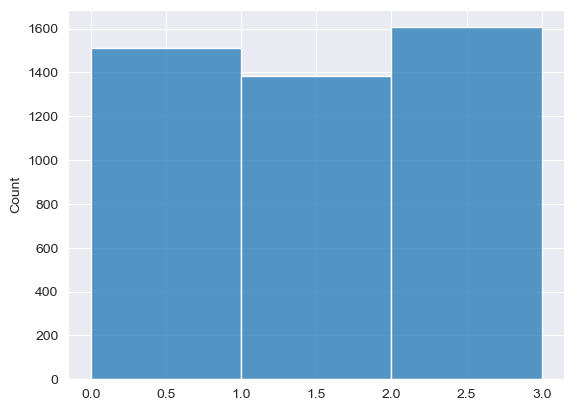

In [39]:
X = df.drop(columns=["r"])

km = KMeans(n_clusters=3, n_init=10)
y = km.fit_predict(X)

sns.histplot(y,bins=[0,1,2,3])

In [40]:
df["km_labels"] = y
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,r,km_labels
0,-5.244266,0,-2.544469,-12,0,0.00000,-7,-19,8,0,0
1,6.000000,0,4.922793,4,0,0.00074,6,11,10,0,2
2,-7.882469,1,0.087773,-10,0,0.00000,-11,-20,8,1,0
3,-7.155857,0,-0.713578,-13,0,1.00000,-10,-24,7,1,0
4,2.257337,1,-2.380117,5,1,0.00000,3,9,10,0,2


- Séparer votre dataframe en une base d'apprentissage `train` (les 3000 premières lignes) et une base de test `test` (les 1500 suivantes). 
- Pour chacun des groupes (vous pouvez filtrer vos données sur la valeur de la colonne 'km_labels')
   - calculer un modèle de régression logistique 
   - et les performances correspondantes (score $s_i$, taux de faux positifs $t_i$) sur la base de test, pour les exemples du même groupe
   - si $n_1$, $n_2$, $n_3$ sont les nombres d'exemples dans chacun des groupes, $s_1$, $s_2$, $s_3$ les scores dans chaque groupe, alors le score global sera 
$$
   s = \frac{n_1s_1  + n_2s_2 + n_3s_3} {n_1  + n_2 + n_3}
$$
   et pour le taux de faux positifs,
$$
   t = \frac{n_1t_1  + n_2t_2 + n_3t_3} {n_1  + n_2 + n_3}
$$
- Comparez les performances aux performances obtenues précédemment et commentez   

In [41]:
train, test = train_test_split(df, test_size=1/3, random_state=42)

In [42]:
train0 = train[train["km_labels"]==0]
test0 = test[test["km_labels"]==0]
X_train0 = train0.drop(columns=["r"])
y_train0 = train0["r"]
X_test0 = test0.drop(columns=["r"])
y_test0 = test0["r"]

model = LogisticRegression(max_iter=1000)
model.fit(X_train0, y_train0)
print("score (train)", model.score(X_train0,y_train0))
print("score (test)",model.score(X_test0,y_test0))


mat = pd.crosstab(y_test0, model.predict(X_test0))

FP0 = mat[1][0]/(mat[1][0] + mat[1][1])

print("taux Faux positif",FP0)

score (train) 0.766
score (test) 0.763671875
taux Faux positif 0.2669172932330827


In [43]:
train1 = train[train["km_labels"]==1]
test1 = test[test["km_labels"]==1]
X_train1 = train1.drop(columns=["r"])
y_train1 = train1["r"]
X_test1 = test1.drop(columns=["r"])
y_test1 = test1["r"]

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train1, y_train1)
print("score (train)", model1.score(X_train1,y_train1))
print("score (test)",model1.score(X_test1,y_test1))


mat = pd.crosstab(y_test1, model1.predict(X_test1))

FP1 = mat[1][0]/(mat[1][0] + mat[1][1])

print("taux Faux positif",FP1)

score (train) 0.7788671023965141
score (test) 0.8017241379310345
taux Faux positif 0.18269230769230768


In [44]:
train2 = train[train["km_labels"]==2]
test2 = test[test["km_labels"]==2]
X_train2 = train2.drop(columns=["r"])
y_train2 = train2["r"]
X_test2 = test2.drop(columns=["r"])
y_test2 = test2["r"]

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)
print("score (train)", model2.score(X_train2,y_train2))
print("score (test)",model2.score(X_test2,y_test2))


mat = pd.crosstab(y_test2, model2.predict(X_test2))

FP2 = mat[1][0]/(mat[1][0] + mat[1][1])

print("taux Faux positif",FP2)

score (train) 0.7948243992606284
score (test) 0.7404580152671756
taux Faux positif 0.2845849802371542


In [45]:
scores_global = (len(y_test0)*model.score(X_test0,y_test0) + len(y_test1)*model1.score(X_test1,y_test1) + len(y_test2)*model2.score(X_test2,y_test2)) / (len(y_test0) + len(y_test1)+ len(y_test2))
print("Le score global est: ", scores_global)

Le score global est:  0.7673333333333333


In [46]:
FP_global = (len(y_test0)*FP0 + len(y_test1)*FP1 + len(y_test2)*FP2) / (len(y_test0) + len(y_test1)+ len(y_test2))
print("Le taux de faux positifs global est: ", FP_global)

Le taux de faux positifs global est:  0.24703560969922522


## Évaluation de la stabilité par bootstrap

- Ré-échantillonnez l'ensemble `train` et générez le même nombre d'échantillons, puis apprenez vos modèles et calculez le score global comme précédemment sur la base de test _inchangée_. 
- Effectuez ceci disons B=200 fois, en stockant les valeurs de scores et taux de faux positifs. 
- Tracez les histogrammes des valeurs obtenues
- Donnez les moyennes et intervalles de confiance correspondant. 

In [47]:
def bootfn(n):
    scores_l = list()
    TFP_l = list()

    for i in range(n):
        train, test = train_test_split(df, test_size=1/3)

        train0 = train[train["km_labels"]==0]
        test0 = test[test["km_labels"]==0]
        X_train0 = train0.drop(columns=["r"])
        y_train0 = train0["r"]
        X_test0 = test0.drop(columns=["r"])
        y_test0 = test0["r"]

        model = LogisticRegression(max_iter=1000)
        model.fit(X_train0, y_train0)

        s0 = model.score(X_test0,y_test0)
        mat = pd.crosstab(y_test0, model.predict(X_test0))
        FP0 = mat[1][0]/(mat[1][0] + mat[1][1])



        train1 = train[train["km_labels"]==1]
        test1 = test[test["km_labels"]==1]
        X_train1 = train1.drop(columns=["r"])
        y_train1 = train1["r"]
        X_test1 = test1.drop(columns=["r"])
        y_test1 = test1["r"]

        model1 = LogisticRegression(max_iter=1000)
        model1.fit(X_train1, y_train1)

        s1 = model1.score(X_test1,y_test1)
        mat = pd.crosstab(y_test1, model1.predict(X_test1))
        FP1 = mat[1][0]/(mat[1][0] + mat[1][1])



        train2 = train[train["km_labels"]==2]
        test2 = test[test["km_labels"]==2]
        X_train2 = train2.drop(columns=["r"])
        y_train2 = train2["r"]
        X_test2 = test2.drop(columns=["r"])
        y_test2 = test2["r"]

        model2 = LogisticRegression(max_iter=1000)
        model2.fit(X_train2, y_train2)
        s2 = model2.score(X_test2,y_test2)
        mat = pd.crosstab(y_test2, model2.predict(X_test2))
        FP2 = mat[1][0]/(mat[1][0] + mat[1][1])



        scores_global = (len(y_test0)*s0 + len(y_test1)*s1 + len(y_test2)*s2) / (len(y_test0) + len(y_test1)+ len(y_test2))

        FP_global = (len(y_test0)*FP0 + len(y_test1)*FP1 + len(y_test2)*FP2) / (len(y_test0) + len(y_test1)+ len(y_test2))
        
        scores_l.append(scores_global)
        TFP_l.append(FP_global)

    return np.array(scores_l), np.array(TFP_l)

In [48]:
result = bootfn(200)
scores = result[0]
tfp = result[1]

<Axes: ylabel='Count'>

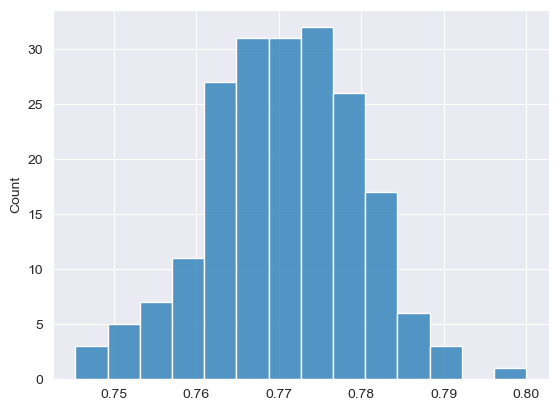

In [49]:
sns.histplot(scores)

<Axes: ylabel='Count'>

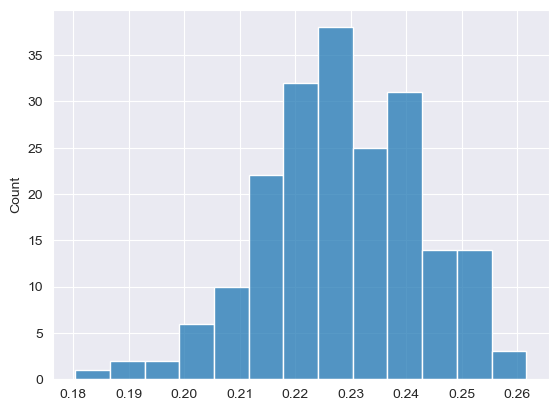

In [50]:
sns.histplot(tfp)

In [51]:
print("Le score moyen est: ", scores.mean())
print("Le taux de faux positifs moyen est: ", tfp.mean())

Le score moyen est:  0.7706000000000001
Le taux de faux positifs moyen est:  0.2285282446387072


In [52]:
import scipy.stats as st

confidence_interval = st.t.interval(confidence=0.99, df=len(scores)-1, loc=np.mean(scores), scale=st.sem(scores)) 
confidence_interval_tfp = st.t.interval(confidence=0.99, df=len(tfp)-1, loc=np.mean(tfp), scale=st.sem(tfp)) 

print(f"L'intervalle de confiance des scores à {confidence_level * 100}% est : {confidence_interval}")
print(f"L'intervalle de confiance des taux de faux positifs à {confidence_level * 100}% est : {confidence_interval_tfp}")

NameError: name 'confidence_level' is not defined